In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import sys
import os
sys.path.insert(0, '..') 
import spectral_denoising as sd
from spectral_denoising.file_io import standardize_col
from spectral_denoising.search_utils import *
from spectral_denoising.spectral_operations import *
from spectral_denoising.spectral_denoising import *
from spectral_denoising.search_utils import *
from spectral_denoising.spectral_denoising import *
from spectral_denoising.spectral_operations import *
from spectral_denoising.identifier_utils import *
from spectral_denoising.spectra_plotter import *
from tqdm import tqdm
fig_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/dilution_series_data/new_fig_arial/fig5'
data_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/Astral/final_using'
import seaborn as sns
import matplotlib.pyplot as plt
if os.path.exists(fig_dir) == False:
    os.mkdir(fig_dir)
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# denoising search: single spectrum

In [11]:

reference_lib= sd.read_df('/Users/fanzhoukong/Documents/GitHub/Libgen_data/curated_library/csv/pos_orbi_sorted.csv')
# reference_lib.dropna(subset=['smiles'], inplace=True)

# query_spectra= sd.read_df('/Users/fanzhoukong/Documents/GitHub/Libgen_data/Astral/Astral/alignment/pos/Height_4_20243141653_posBA.csv')
query_spectra_astral= sd.read_df('/Users/fanzhoukong/Documents/GitHub/Libgen_data/Astral/Astral/alignment/pos/Astral_algnment.csv')
# query_spectra= sd.read_df('/Users/fanzhoukong/Documents/GitHub/Libgen_data/Astral/Astral/alignment/pos/20240311ST_posHILIC_NIST_Astral_AGC1.csv')
# query_spectra = query_spectra[['precursor_mz','peaks']]
# query_spectra.dropna(subset=['peaks'],inplace=True) 
from spectral_denoising.denoising_search import *
astral_result = sd.denoising_search_batch(query_spectra_astral['peaks'], query_spectra_astral['precursor_mz'], reference_lib)
ast_top_hit_raw = pd.DataFrame()

for r in astral_result:
    if len(r)>0:
        r.sort_values(by = 'entropy_similarity', ascending= False, inplace=True)
        ast_top_hit_raw = pd.concat([ast_top_hit_raw, r.iloc[0:1]], ignore_index=True) 
sd.save_df(ast_top_hit_raw, os.path.join(data_dir, 'astral_top_hit_raw.csv'))

done read in df...
done read in df...
im newnew


100%|██████████| 5012/5012 [07:06<00:00, 11.76it/s]


['peaks', 'query_peaks', 'denoised_peaks']


100%|██████████| 4979/4979 [00:00<00:00, 32593.66it/s]


In [9]:
ast_top_hit_l1 = pd.DataFrame()

for r in astral_result:
    if len(r)>0:
        r.sort_values(by = 'denoised_similarity', ascending= False, inplace=True)
        ast_top_hit_l1 = pd.concat([ast_top_hit_l1, r.iloc[0:1]], ignore_index=True) 

In [10]:
np.sum(ast_top_hit_l1['denoised_similarity']>0.75)

np.int64(548)

In [13]:
ast_raw_mapped = ast_top_hit_raw[ast_top_hit_raw['entropy_similarity'] > 0.4]

In [132]:
count = 0
for r in astral_result:
    if len(r)>0:
        if r['entropy_similarity'].max()>0.75:
            count +=1
count

355

In [7]:
count = 0
for r in astral_result:
    if len(r)>0:
        
        if r['denoised_similarity'].max()>0.75:
            count +=1
count

548

In [10]:
exploris_query_spectra= sd.read_df('/Users/fanzhoukong/Documents/GitHub/Libgen_data/Astral/Exploris/alignment/pos/Exploris_alignment_cleaned.csv')
denoised_count = 0
raw_count = 0
exploris_result = sd.denoising_search_batch(exploris_query_spectra['peaks'], exploris_query_spectra['precursor_mz'], reference_lib)
for r in exploris_result:
    if len(r)>0:
        if r['entropy_similarity'].max()>0.75:
            raw_count +=1
        if r['denoised_similarity'].max()>0.75:
            denoised_count +=1
print(f'the annotation for denoised search is {denoised_count}, for entropy search is {raw_count}')

done read in df...
im newnew


100%|██████████| 1889/1889 [05:28<00:00,  5.76it/s]


the annotation for denoised search is 277, for entropy search is 223


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


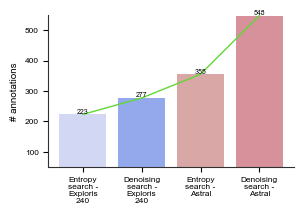

In [14]:
n_anno = [223, 277, 355, 548]
labels = ['Entropy search - Exploris 240', 'Denoising search - Exploris 240','Entropy search - Astral', 'Denoising search - Astral']
fig = plt.figure(figsize = (3.14,3.14/3.5*2.5))#43
ax1 = fig.add_subplot()
colors = ['#AAB6F7','#3564F7', '#CE5F5A','#CE3549']
sns.barplot(x = labels, y = n_anno, ax = ax1, alpha = 0.6, palette = colors, )
for i in ax1.containers:
    ax1.bar_label(i,size = 5)
sns.lineplot(x = labels, y = n_anno, ax = ax1, color = '#61D837',linewidth = 1)
wrap_labels(ax1, 10)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.set_ylim(50, 550)
ax1.set_facecolor("white")
# plt.legend()
plt.ylabel('# annotations', size = 7)
# ax.set_xlabel('Explained ion intensity (%)'  , size = 7,fontdict={'weight': 'bold'})
# ax.set_ylabel('Probability density estimate', size = 7)

ax1.tick_params(labelsize=6)
# plt.xlabel('')
fig.tight_layout()
ax1.spines['left'].set_color('#313131')
ax1.spines['bottom'].set_color('#313131')
ax1.spines[['right', 'top']].set_visible(False)
plt.savefig(os.path.join(fig_dir, 'n_annotation_astral.eps'), dpi = 300)

In [ ]:
ast_top_hit_raw = pd.DataFrame()

for r in astral_result:
    if len(r)>0:
        r.sort_values(by = 'entropy_similarity', ascending= False, inplace=True)
        ast_top_hit_raw = pd.concat([ast_top_hit_raw, r.iloc[0:1]], ignore_index=True) 


ast_top_hit_l1 = pd.DataFrame()

for r in astral_result:
    if len(r)>0:
        r.sort_values(by = 'denoised_similarity', ascending= False, inplace=True)
        ast_top_hit_l1 = pd.concat([ast_top_hit_l1, r.iloc[0:1]], ignore_index=True) 
exp_top_hit_l1 = pd.DataFrame()
for r in exploris_result:
    if len(r)>0:
        r.sort_values(by = 'denoised_similarity', ascending= False, inplace=True)
        exp_top_hit_l1 = pd.concat([exp_top_hit_l1, r.iloc[0:1]], ignore_index=True) 
exp_top_hit_raw = pd.DataFrame()
for r in exploris_result:
    if len(r)>0:
        r.sort_values(by = 'entropy_similarity', ascending= False, inplace=True)
        exp_top_hit_raw = pd.concat([exp_top_hit_raw, r.iloc[0:1]], ignore_index=True) 
ast_top_hit_l1['instrument']='ast'
exp_top_hit_raw['instrument']='exp'
exp_top_hit_l1['instrument']='exp'
sd.save_df(ast_top_hit_l1, os.path.join(data_dir, 'astral_top_hit_raw.csv'))
sd.save_df(ast_top_hit_l1, os.path.join(data_dir, 'ast_top_hit_l1.csv'))
sd.save_df(exp_top_hit_raw, os.path.join(data_dir, 'exp_top_hit_raw.csv'))
sd.save_df(exp_top_hit_l1, os.path.join(data_dir, 'exp_top_hit_l1.csv'))

In [10]:
ast_top_hit_l1 = sd.read_df(os.path.join(data_dir, 'ast_top_hit_l1.csv'))
ast_top_hit_raw = sd.read_df(os.path.join(data_dir, 'astral_top_hit_raw.csv'))
exp_top_hit_raw = sd.read_df(os.path.join(data_dir, 'exp_top_hit_raw.csv'))
exp_top_hit_l1 = sd.read_df(os.path.join(data_dir, 'exp_top_hit_l1.csv'))


done read in df...
done read in df...
done read in df...
done read in df...


In [73]:
ast_raw_mapped = ast_top_hit_raw[ast_top_hit_raw['entropy_similarity'] > 0.75]
ast_raw_mapped.columns = list(ast_raw_mapped.columns[:-1]) + ['query_precursor_mz']
ast_raw_mapped = ast_raw_mapped[['name', 'precursor_mz', 'adduct', 'smiles', 'entropy_similarity','query_precursor_mz']]
ast_raw_mapped.rename(columns = {'entropy_similarity':'spectral_similarity'}, inplace = True)
ast_raw_mapped['method']='Entropy search - Astral'
# sd.save_df(ast_raw_mapped, os.path.join(data_dir, 'ast_raw_mapped.csv'))

In [75]:
ast_denoised_mapped = ast_top_hit_l1[ast_top_hit_l1['denoised_similarity'] > 0.75]
ast_denoised_mapped.columns = list(ast_denoised_mapped.columns[:-2]) + ['query_precursor_mz']+['instrument']
ast_denoised_mapped = ast_denoised_mapped[['name', 'precursor_mz', 'adduct', 'smiles', 'denoised_similarity', 'query_precursor_mz']]
ast_denoised_mapped.rename(columns = {'denoised_similarity':'spectral_similarity'}, inplace = True)
ast_denoised_mapped['method']='Denoising search - Astral'

In [78]:
exp_raw_mapped = exp_top_hit_raw[exp_top_hit_raw['entropy_similarity'] > 0.75]
exp_raw_mapped.columns = list(exp_raw_mapped.columns[:-2]) + ['query_precursor_mz']+['instrument']
exp_raw_mapped = exp_raw_mapped[['name', 'precursor_mz', 'adduct', 'smiles', 'entropy_similarity', 'query_precursor_mz']]
exp_raw_mapped.rename(columns = {'entropy_similarity':'spectral_similarity'}, inplace = True)
exp_raw_mapped['method']='Entropy search - Exploris 240'
# exp_raw_mapped.columns = list(exp_raw_mapped.columns[:-1]) + ['query_precursor_mz']

In [88]:
exp_denoised_mapped = exp_top_hit_l1[exp_top_hit_l1['denoised_similarity'] > 0.75]
exp_denoised_mapped.columns = list(exp_denoised_mapped.columns[:-2]) + ['query_precursor_mz']+['instrument']
exp_denoised_mapped = exp_denoised_mapped[['name', 'precursor_mz', 'adduct', 'smiles', 'denoised_similarity', 'query_precursor_mz']]
exp_denoised_mapped.rename(columns = {'denoised_similarity':'spectral_similarity'}, inplace = True)
exp_denoised_mapped['method']='Denoising search - Exploris 240'

In [89]:
fig5a = pd.concat([ast_raw_mapped, ast_denoised_mapped, exp_raw_mapped, exp_denoised_mapped], ignore_index=True)

In [92]:
fig5a.to_csv(os.path.join(data_dir, 'fig5a.csv'), index = False)

In [93]:
data_dir

'/Users/fanzhoukong/Documents/GitHub/Libgen_data/Astral/final_using'

In [94]:
ast_denoised_mapped = ast_top_hit_l1[ast_top_hit_l1['entropy_similarity'] > 0.4]

In [95]:
ast_denoised_mapped.columns = list(ast_denoised_mapped.columns[:-2]) + ['query_precursor_mz']+['instrument']
ast_denoised_mapped = ast_denoised_mapped[['name', 'precursor_mz', 'adduct', 'smiles', 'entropy_similarity','denoised_similarity', 'query_precursor_mz']]
# ast_denoised_mapped.rename(columns = {'denoised_similarity':'spectral_similarity'}, inplace = True)
# ast_denoised_mapped['method']='Denoising search - Astral'

In [100]:
0.708944-0.620300

0.08864400000000006

In [104]:
ast_denoised_mapped.to_csv(os.path.join(data_dir, 'fig5b.csv'), index = False)

<Axes: xlabel='entropy_similarity', ylabel='Density'>

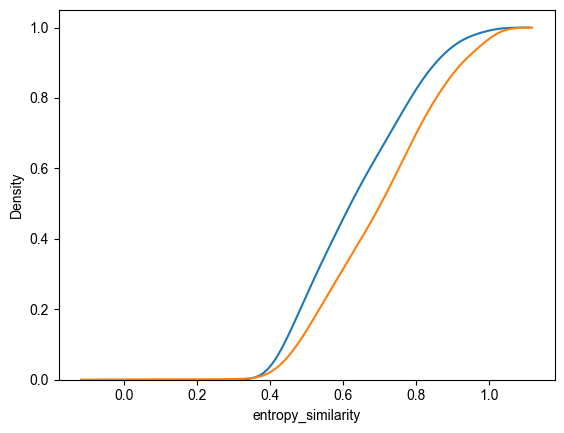

In [97]:
sns.kdeplot(ast_denoised_mapped['entropy_similarity'], label = 'Entropy search - Astral', cumulative = True)
sns.kdeplot(ast_denoised_mapped['denoised_similarity'], label = 'Denoising search - Astral', cumulative = True)

In [13]:
mapped_l1['denoised_similarity'].describe()

count    1319.000000
mean        0.699572
std         0.162744
min         0.274038
25%         0.564102
50%         0.709008
75%         0.820110
max         1.000000
Name: denoised_similarity, dtype: float64

In [16]:
fig5_dir = '/Users/fanzhoukong/Desktop/UCDAVIS_Phd/spectral_denoising/publication_materials/source_data/fig5'

In [4]:
mapped = ast_top_hit_l1[ast_top_hit_l1['entropy_similarity']>0.4]

In [7]:
np.sum(ast_top_hit_l1['entropy_similarity']>0.75)

np.int64(343)

In [14]:
mapped['denoised_similarity'].median()-mapped['entropy_similarity'].median()

np.float64(0.08864349126815796)

In [11]:
fig5b= ast_top_hit_l1[ast_top_hit_l1['entropy_similarity']>0.4]

In [14]:
fig5b = fig5b[['name', 'precursor_mz', 'smiles', 'adduct', 'entropy_similarity', 'denoised_similarity']]

In [17]:
fig5b.to_csv(os.path.join(fig5_dir, 'fig5b.csv'), index = False)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


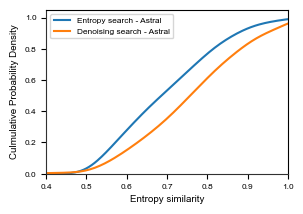

In [15]:
fig = plt.figure(figsize = (3.14,3.14/3.5*2.5))#43
ax1 = fig.add_subplot()
sns.kdeplot(mapped['entropy_similarity'], label = 'Entropy search - Astral', cumulative = True)

sns.kdeplot(mapped['denoised_similarity'], label = 'Denoising search - Astral', cumulative = True)
# sns.kdeplot(top_hit_l2['entropy_l2'], label = 'l2', cumulative=True)
plt.legend(facecolor = 'white')
plt.grid(False)
ax1.set_facecolor("white")
plt.xlim(0.4,1)
plt.ylabel('Culmulative Probability Density', size = 7)
plt.xlabel('Entropy similarity', size = 7)
# plt.xlabel('')

fig.tight_layout()
ax1.tick_params(labelsize=6)
sns.move_legend(ax1, labelspacing=0.2, loc='best') 
# plt.setp(ax1.get_legend().get_texts(), fontsize='5')  
    
#     # for legend title
# plt.setp(ax1.get_legend().get_title(), fontsize='5')
 
ax1.spines['left'].set_color('#313131')
ax1.spines['bottom'].set_color('#313131')
plt.legend(fontsize = '6')
plt.tight_layout()
# plt.savefig(os.path.join(fig_dir, 'cdf_astral.png'))
plt.savefig(os.path.join(fig_dir,'cdf_astral.eps'), dpi= 300)

In [55]:
fig5d = pd.DataFrame()
for i in [1101, 91, 1527, 692]:
    fig5d = pd.concat([fig5d, pd.DataFrame([ast_top_hit_l1.loc[i]])])

In [57]:
fig5d = fig5d[['name', 'adduct', 'smiles', 'denoised_similarity', 'denoised_peaks', 'peaks', 'instrument']]

In [59]:
fig5d.rename(columns = {'peaks':'library_peaks'}, inplace=True)

In [60]:
sd.save_df(fig5d, os.path.join(fig5_dir, 'fig5d.csv'))

['denoised_peaks', 'library_peaks']


100%|██████████| 4/4 [00:00<00:00, 1834.18it/s]


this is compound Irganox 565 with adduct [M+H]+ and precursor_mz precursor_mz    589.3968
precursor_mz    589.3985
Name: 1101, dtype: object
Data saved to /Users/fanzhoukong/Documents/GitHub/Libgen_data/dilution_series_data/new_fig_arial/fig5/Irganox 565_mol.cdf
entropy similarity is 0.7765308618545532


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/new_env2/lib/python3.12/site-packages/matplotlib/pyplot.py'>

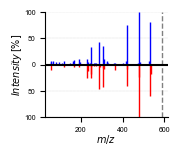

In [62]:

instance = ast_top_hit_l1.loc[1101]
print(f'this is compound {instance["name"]} with adduct {instance["adduct"]} and precursor_mz {instance["precursor_mz"]}')
# everything_to_image(instance['smiles'], os.path.join(fig_dir,str(instance['name'])+'_smiles.png'))
mol_to_cdf(Chem.MolFromSmiles(instance['smiles']), os.path.join(fig_dir,str(instance['name'])+'_mol'))
mol_to_svg(Chem.MolFromSmiles(instance['smiles']), os.path.join(fig_dir,str(instance['name'])+'_mol'))
head_to_tail_plot(instance['denoised_peaks'], instance['peaks'], instance['precursor_mz'][0], publication=True, savepath=os.path.join(fig_dir,'head_to_tail_plot_astral_'+str(instance['name'])+'.eps'), linewidth=1)
# head_to_tail_plot(instance['peaks_denoised'], instance['library_peaks'], instance['precursor_mz'], publication=True, savepath=os.path.join(fig_dir,'head_to_tail_plot_denoised_'+str(instance['name'])+'.png'))

this is compound Amino[(4-methylbenzyl)sulfanyl]methanimine with adduct [M+H-CH4N2S]+ and precursor_mz precursor_mz     105.0699
precursor_mz    105.07016
Name: 91, dtype: object
Data saved to /Users/fanzhoukong/Documents/GitHub/Libgen_data/dilution_series_data/new_fig_arial/fig5/Amino[(4-methylbenzyl)sulfanyl]methanimine_mol.cdf
entropy similarity is 0.9593749642372131


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/new_env2/lib/python3.12/site-packages/matplotlib/pyplot.py'>

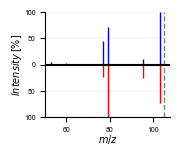

In [63]:

instance = ast_top_hit_l1.loc[91]
print(f'this is compound {instance["name"]} with adduct {instance["adduct"]} and precursor_mz {instance["precursor_mz"]}')
mol_to_cdf(Chem.MolFromSmiles(instance['smiles']), os.path.join(fig_dir,str(instance['name'])+'_mol'))
mol_to_svg(Chem.MolFromSmiles(instance['smiles']), os.path.join(fig_dir,str(instance['name'])+'_mol'))
# everything_to_image(instance['smiles'], os.path.join(fig_dir,str(instance['name'])+'_smiles.png'))
head_to_tail_plot(instance['denoised_peaks'], instance['peaks'], instance['precursor_mz'][0], publication=True, savepath=os.path.join(fig_dir,'head_to_tail_plot_astral_'+str(instance['name'])+'.eps'), linewidth=1)


this is compound threo-Dihydrobupropion with adduct [M+H-C4H10O]+ and precursor_mz precursor_mz     168.0574
precursor_mz    168.05777
Name: 1527, dtype: object
Data saved to /Users/fanzhoukong/Documents/GitHub/Libgen_data/dilution_series_data/new_fig_arial/fig5/threo-Dihydrobupropion_mol.cdf
entropy similarity is 0.889201819896698


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/new_env2/lib/python3.12/site-packages/matplotlib/pyplot.py'>

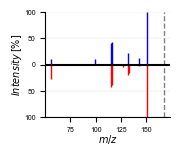

In [64]:

instance = ast_top_hit_l1.loc[1527]
print(f'this is compound {instance["name"]} with adduct {instance["adduct"]} and precursor_mz {instance["precursor_mz"]}')
mol_to_cdf(Chem.MolFromSmiles(instance['smiles']), os.path.join(fig_dir,str(instance['name'])+'_mol'))
mol_to_svg(Chem.MolFromSmiles(instance['smiles']), os.path.join(fig_dir,str(instance['name'])+'_mol'))
# everything_to_image(instance['smiles'], os.path.join(fig_dir,str(instance['name'])+'_smiles.png'))
head_to_tail_plot(instance['denoised_peaks'], instance['peaks'], instance['precursor_mz'][0], publication=True, savepath=os.path.join(fig_dir,'head_to_tail_plot_astral_'+str(instance['name'])+'.eps'), linewidth=1)


this is compound (5E)-3-Butyl-5-(1-methylpyridin-2(1H)-ylidene)-2-thioxo-1,3-thiazolidin-4-one with adduct [M+H-C5H9NS2]+ and precursor_mz precursor_mz       134.06
precursor_mz    134.06029
Name: 692, dtype: object
Data saved to /Users/fanzhoukong/Documents/GitHub/Libgen_data/dilution_series_data/new_fig_arial/fig5/(5E)-3-Butyl-5-(1-methylpyridin-2(1H)-ylidene)-2-thioxo-1,3-thiazolidin-4-one_mol.cdf
entropy similarity is 1.0


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/new_env2/lib/python3.12/site-packages/matplotlib/pyplot.py'>

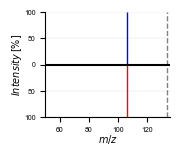

In [65]:

instance = ast_top_hit_l1.loc[692]
print(f'this is compound {instance["name"]} with adduct {instance["adduct"]} and precursor_mz {instance["precursor_mz"]}')
mol_to_cdf(Chem.MolFromSmiles(instance['smiles']), os.path.join(fig_dir,str(instance['name'])+'_mol'))
mol_to_svg(Chem.MolFromSmiles(instance['smiles']), os.path.join(fig_dir,str(instance['name'])+'_mol'))
# everything_to_image(instance['smiles'], os.path.join(fig_dir,str(instance['name'])+'_smiles.png'))
head_to_tail_plot(instance['denoised_peaks'], instance['peaks'], instance['precursor_mz'][0], publication=True, savepath=os.path.join(fig_dir,'head_to_tail_plot_astral_'+str(instance['name'])+'.eps'), linewidth=1, manual_min=50)


In [23]:
matched_all = pd.concat([ast_top_hit_l1, exp_top_hit_raw], ignore_index=True)
matched_all = matched_all[matched_all['denoised_similarity']>0.75]

In [24]:
class_all= []
superclass_all = []
kindom_all = []
for index, row in tqdm(matched_all.iterrows(), total = len(matched_all)):
    class_row = np.nan
    superclass_row = np.nan
    kindom_row = np.nan
    r = get_classyfire(row['smiles'], if_np=False)
    if isinstance(r, float)==False:
        if 'class' in r.keys():
            if r['class'] is not None and 'name' in r['class'].keys():
                class_row = r['class']['name']
        if 'superclass' in r.keys():
            if r['superclass'] is not None and 'name' in r['superclass'].keys():
                superclass_row = r['superclass']['name']
        if 'kingdom' in r.keys():
            if r['kingdom'] is not None and 'name' in r['kingdom'].keys():
                kindom_row = r['kingdom']['name']
    class_all.append(class_row)
    superclass_all.append(superclass_row)
    kindom_all.append(kindom_row)
matched_all['class']=class_all
matched_all['superclass']=superclass_all
matched_all['kingdom']=kindom_all

100%|██████████| 822/822 [05:45<00:00,  2.38it/s]


In [25]:
sd.save_df(matched_all, os.path.join(fig_dir, 'ast_exp_matched_all_classyer.csv'))

['peaks', 'query_peaks', 'denoised_peaks']


100%|██████████| 822/822 [00:00<00:00, 33608.40it/s]


In [18]:
matched_all = sd.read_df(os.path.join(data_dir, 'ast_exp_matched_all_classyer.csv'))

done read in df...


In [21]:
matched_all

,lib_id,peaks,name,precursor_mz,adduct,smiles,comments,master_formula,entropy_similarity,denoised_similarity,query_peaks,denoised_peaks,precursor_mz,instrument,class,superclass,kingdom
0,204858,"[[117.0701, 2.3], [148.1123, 58.5], [166.123, ...",.alpha.-[2-(Methylamino)ethyl]benzyl alcohol,166.1226,[M+H]+,CNCCC(O)c1ccccc1,NIST Mass Spectrometry Data Center,C10H15N3O2,0.646220,0.762252,"[[77.03851, 288.0], [78.29546, 375.0], [82.064...","[[77.03851, 288.0], [82.06471, 222.0], [108.08...",166.12286,ast,Organonitrogen compounds,Organic nitrogen compounds,Organic compounds
1,50519,"[[55.0176, 1.2], [67.0538, 8.5], [79.0537, 136...",(1-Hydroxycyclohexyl)acetic acid,123.0804,[M+H-2H2O]+,O=C(O)CC1(O)CCCCC1,NIST Mass Spectrometry Data Center,C8H10O,0.724503,0.761494,"[[67.05415, 603.0], [79.05418, 2242.0], [81.06...","[[67.05415, 603.0], [79.05418, 2242.0], [81.06...",123.07925,ast,Organooxygen compounds,Organic oxygen compounds,Organic compounds
2,36896,"[[79.0538, 3.3], [91.0539, 165.4], [93.0695, 4...","8S-Hydroxy-4Z,6E,10Z-hexadecatrienoic acid",119.0855,[M+H-C7H16O3]+,CCCCCC=CCC(O)C=CC=CCCC(=O)O,NIST Mass Spectrometry Data Center,C9H10,0.735102,0.885565,"[[50.10039, 329.0], [78.03374, 1832.0], [91.05...","[[91.05399, 11750.0], [103.05396, 637.0], [104...",119.08572,ast,Fatty Acyls,Lipids and lipid-like molecules,Organic compounds
3,36896,"[[79.0538, 3.3], [91.0539, 165.4], [93.0695, 4...","8S-Hydroxy-4Z,6E,10Z-hexadecatrienoic acid",119.0855,[M+H-C7H16O3]+,CCCCCC=CCC(O)C=CC=CCCC(=O)O,NIST Mass Spectrometry Data Center,C9H10,0.673551,0.801512,"[[81.04456, 13075.0], [91.05415, 223812.0], [9...","[[91.05415, 223812.0], [93.06998, 10147.0], [1...",119.08573,ast,Fatty Acyls,Lipids and lipid-like molecules,Organic compounds
4,13918,"[[65.0383, 1.3], [79.0539, 20.9], [91.0539, 80...",cis/trans-(S)-(-)-Limonene oxide,107.0855,[M+H-C2H6O]+,C=C(C)C1CCC2(C)OC2C1,NIST Mass Spectrometry Data Center,C8H10,0.932273,0.932273,"[[65.03867, 9742.0], [79.05431, 4422.0], [91.0...","[[65.03867, 9742.0], [79.05431, 4422.0], [91.0...",107.08571,ast,Oxepanes,Organoheterocyclic compounds,Organic compounds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,1426573,"[[71.0729, 6.5], [86.0962, 159.0], [98.984, 7....","1-(1Z-Octadecenyl)-2-(4Z,7Z,10Z,13Z,16Z,19Z-do...",818.6058,[M+H]+,CCC=CCC=CCC=CCC=CCC=CCC=CCCC(=O)OC(COC=CCCCCCC...,NIST Mass Spectrometry Data Center,C48H84NO7P,0.871391,0.913669,"[[86.09644, 302553.0], [88.46697, 4030.0], [98...","[[86.09644, 302553.0], [88.46697, 4030.0], [98...",818.60413,exp,NaN,NaN,NaN
818,1444987,"[[71.0729, 4.1], [86.0964, 134.0], [87.0997, 8...",1-Docosahexaenoyl-2-stearoyl-sn-glycero-3-phos...,834.6007,[M+H]+,CCC=CCC=CCC=CCC=CCC=CCC=CCCC(=O)OCC(COP(=O)([O...,NIST Mass Spectrometry Data Center,C48H84NO8P,0.760669,0.771143,"[[91.0545, 8225.0], [95.08591, 5538.0], [98.98...","[[91.0545, 8225.0], [95.08591, 5538.0], [98.98...",834.59912,exp,NaN,NaN,NaN
819,1444987,"[[71.0729, 4.1], [86.0964, 134.0], [87.0997, 8...",1-Docosahexaenoyl-2-stearoyl-sn-glycero-3-phos...,834.6007,[M+H]+,CCC=CCC=CCC=CCC=CCC=CCC=CCCC(=O)OCC(COP(=O)([O...,NIST Mass Spectrometry Data Center,C48H84NO8P,0.783047,0.792032,"[[94.92798, 4097.0], [95.08525, 4851.0], [98.9...","[[95.08525, 4851.0], [98.98414, 133890.0], [10...",834.59955,exp,NaN,NaN,NaN
820,1444984,"[[71.0727, 5.8], [86.0959, 115.9], [98.9837, 8...",1-Stearoyl-2-docosahexaenoyl-sn-glycero-3-phos...,834.6007,[M+H]+,CCC=CCC=CCC=CCC=CCC=CCC=CCCC(=O)OC(COC(=O)CCCC...,NIST Mass Spectrometry Data Center,C48H84NO8P,0.751620,0.771209,"[[88.36983, 4017.0], [91.05412, 6273.0], [93.0...","[[88.36983, 4017.0], [91.05412, 6273.0], [93.0...",834.59985,exp,NaN,NaN,NaN


In [22]:
fig5d = matched_all[['name', 'precursor_mz', 'adduct', 'instrument', 'class', 'superclass', 'kingdom']]

In [23]:
fig5d

,name,precursor_mz,precursor_mz,adduct,instrument,class,superclass,kingdom
0,.alpha.-[2-(Methylamino)ethyl]benzyl alcohol,166.1226,166.12286,[M+H]+,ast,Organonitrogen compounds,Organic nitrogen compounds,Organic compounds
1,(1-Hydroxycyclohexyl)acetic acid,123.0804,123.07925,[M+H-2H2O]+,ast,Organooxygen compounds,Organic oxygen compounds,Organic compounds
2,"8S-Hydroxy-4Z,6E,10Z-hexadecatrienoic acid",119.0855,119.08572,[M+H-C7H16O3]+,ast,Fatty Acyls,Lipids and lipid-like molecules,Organic compounds
3,"8S-Hydroxy-4Z,6E,10Z-hexadecatrienoic acid",119.0855,119.08573,[M+H-C7H16O3]+,ast,Fatty Acyls,Lipids and lipid-like molecules,Organic compounds
4,cis/trans-(S)-(-)-Limonene oxide,107.0855,107.08571,[M+H-C2H6O]+,ast,Oxepanes,Organoheterocyclic compounds,Organic compounds
...,...,...,...,...,...,...,...,...
817,"1-(1Z-Octadecenyl)-2-(4Z,7Z,10Z,13Z,16Z,19Z-do...",818.6058,818.60413,[M+H]+,exp,NaN,NaN,NaN
818,1-Docosahexaenoyl-2-stearoyl-sn-glycero-3-phos...,834.6007,834.59912,[M+H]+,exp,NaN,NaN,NaN
819,1-Docosahexaenoyl-2-stearoyl-sn-glycero-3-phos...,834.6007,834.59955,[M+H]+,exp,NaN,NaN,NaN
820,1-Stearoyl-2-docosahexaenoyl-sn-glycero-3-phos...,834.6007,834.59985,[M+H]+,exp,NaN,NaN,NaN


In [23]:
found_ast = []
found_exp = []
for index, row in matched_all.iterrows():
    temp = string_search(matched_all, 'name', row['name'])
    if 'ast' in list(temp['instrument']):
        found_ast.append(True)
    else:
        found_ast.append(False)
    if 'exp' in list(temp['instrument']):
        found_exp.append(True)
    else:
        found_exp.append(False)
matched_all['found_ast']=found_ast
matched_all['found_exp']=found_exp

In [24]:
matched_all_ast = string_search(matched_all, 'instrument', 'ast')
matched_all_exp = string_search(matched_all, 'instrument', 'exp')

In [29]:
84/30

2.8

In [25]:
ast_value_counts =  pd.DataFrame(matched_all_ast['superclass'].value_counts().rename_axis('unique_values').reset_index(name='counts'))
exp_counts = []
for index, row in ast_value_counts.iterrows():
    temp = string_search(matched_all_exp, 'superclass', row['unique_values'])
    exp_counts.append(len(temp))
ast_value_counts['exp_counts']=exp_counts

In [27]:
ast_value_counts.rename(columns = {'unique_values':'superclass', 'counts':'Astral', 'exp_counts':'Exploris 240'}, inplace=True)

In [61]:
ast_value_counts.to_csv(os.path.join(fig5_dir, 'fig5c.csv'), index = False)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Text(0.9883769776225868, -0.05666524601235572, 'Others')


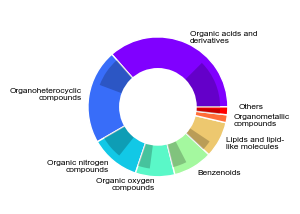

In [49]:
labels = ast_value_counts['unique_values'][0:7].tolist()
labels.append('Others')
ast_count = ast_value_counts['counts'][0:7].tolist()
ast_count.append(ast_value_counts['counts'][7:].sum())
exp_count = ast_value_counts['exp_counts'][0:7].tolist()
exp_count.append(ast_value_counts['exp_counts'][7:].sum())
exp_count_in= []
for i in range(0, len(ast_count)):
    exp_count_in.append(exp_count[i])
    exp_count_in.append(ast_count[i]-exp_count[i])
import matplotlib.pyplot as plt
import numpy as np
from textwrap import wrap
fig, ax = plt.subplots(figsize = (3.14,3.14/3.5*2.5))

ax.axis('equal')
width = 0.5
labels = ast_value_counts['unique_values'][0:7].tolist()
labels.append('Others')
# Outer ring
cm = plt.get_cmap("rainbow")
cout = list(cm(np.linspace(0,1,len(labels))))


# pie[2].set_visible(False)
# Inner ring
cin = []
cin_cof = 0.3
for i in range(0, len(cout)):
    color_temp = cout[i].copy()
    color_temp[0]=color_temp[0]*cin_cof
    color_temp[1]=color_temp[1]*cin_cof
    color_temp[2]=color_temp[2]*cin_cof
    color_temp[3]=color_temp[3]*cin_cof
    cin.append(color_temp)
    cin.append(color_temp)
# labels = list(map("".join, zip(list("aabbcc"),map(str, [1,2]*3))))
# wrapped = [ label.replace(' ', '\n') for label in labels ]
wrapped =[ '\n'.join(wrap(l, 20)) for l in labels ]
pie, _ = ax.pie(ast_count, radius=0.9, labels=wrapped, colors=cout,labeldistance=1.1, textprops={'fontsize': 6})
print(_[-1])
_[-1].set_position((1.0336201505647833, -0))
pie2, _ = ax.pie(exp_count_in, radius=0.8,
                 colors=cin)
plt.setp(pie, width=width, edgecolor='white')


pie3, _ = ax.pie([365], radius=0.5, colors = 'white')
# pie3, _ = ax.pie(1, radius=width,
#                  labeldistance=0.7, colors=cout)
for i in range(0, len(exp_count_in)):
    if i%2==1:
        pie2[i].set_visible(False)
# plt.setp(pie2, width=width, edgecolor='white')
# plt.show()
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'sunburst.eps'), facecolor = 'white', dpi = 300)